<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

Try a variety of response variables. Start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import KFold

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# A:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [5]:
# A: No problem in this data
print(df.dtypes)
df.head()

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [6]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11, 7))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

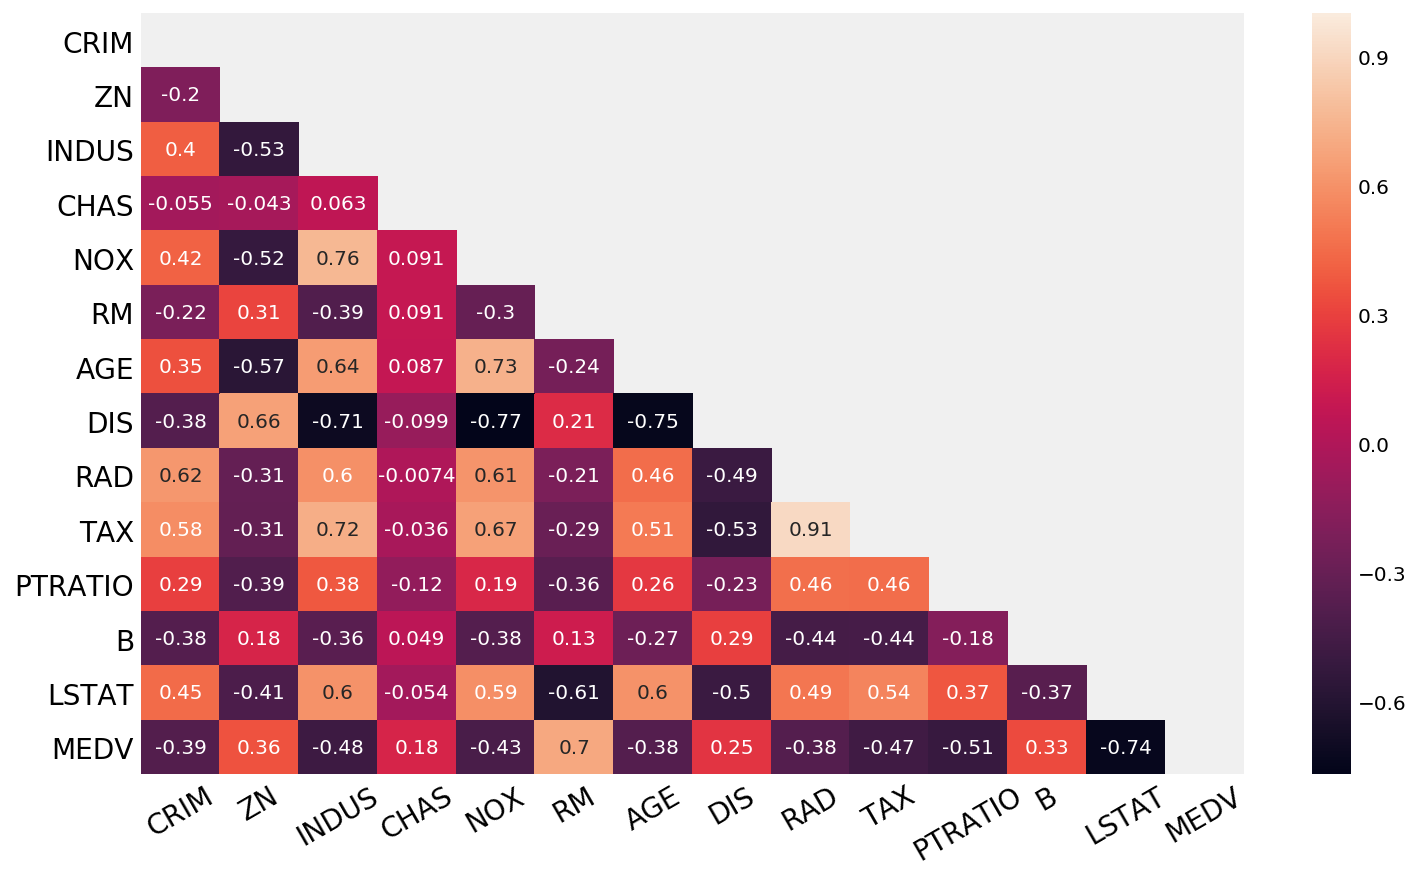

In [7]:
df_with_target = df.copy()
df_with_target['MEDV'] = y
correlation_heat_map(df_with_target)

In [8]:
# A:
model = LinearRegression()

# determaind the values
X = df[['LSTAT' , 'ZN' , 'CHAS']]


In [9]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [10]:
model.fit(X_train,y_train)

# Print coefficients
# B1, B0
print(model.coef_[0] , model.intercept_ )

#socre
print(model.score(X_train, y_train))

-0.8516903023904253 32.737017539757545
0.5824063574228704


In [11]:
#test score
print(model.score(X_test, y_test))

0.5390687262876432


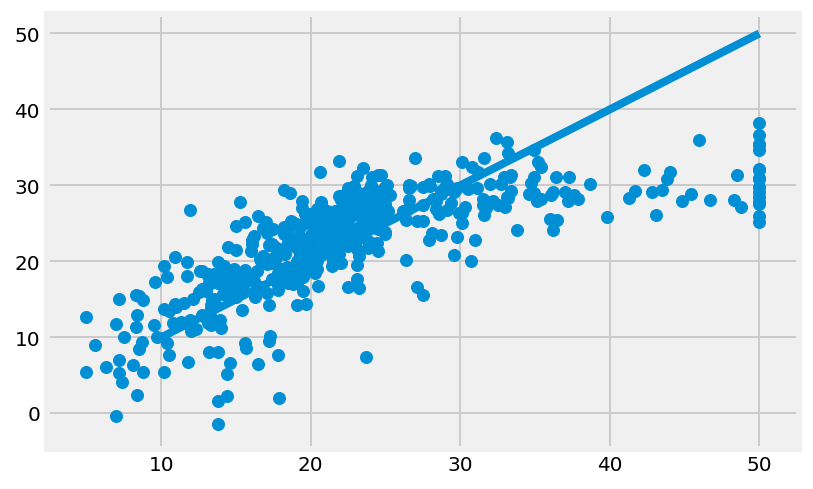

In [12]:
#plot 
predictions = cross_val_predict(model, X, y, cv=5)
point_1 = [10, 50]
plt.plot(point_1, point_1)
plt.scatter(y, predictions)
plt.show()

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

-0.8413985231088449 32.37463998177555


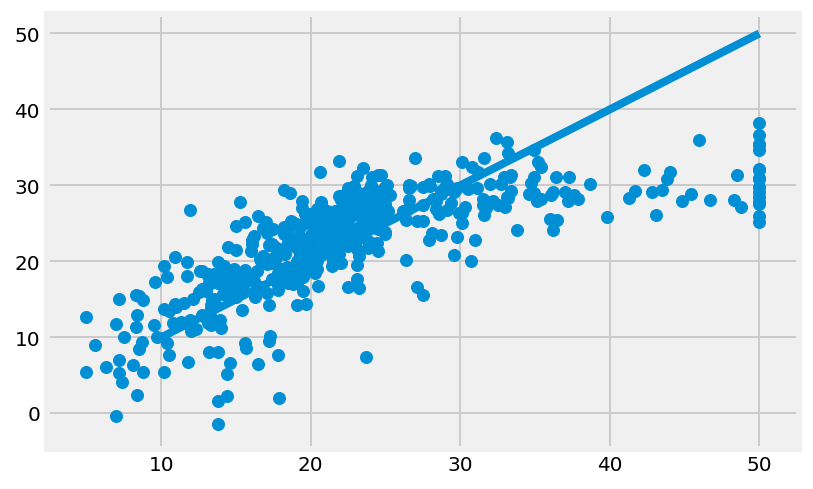

In [13]:
# A: 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
predictions = cross_val_predict(model, X, y, cv=3)

model.fit(X_train,y_train)

# Print coefficients
# B1, B0
print(model.coef_[0] , model.intercept_ )

predictions = cross_val_predict(model, X, y, cv=5)

point_1 = [10, 50]
plt.plot(point_1, point_1)
plt.scatter(y, predictions)
plt.show()

-0.8413985231088449 32.37463998177555


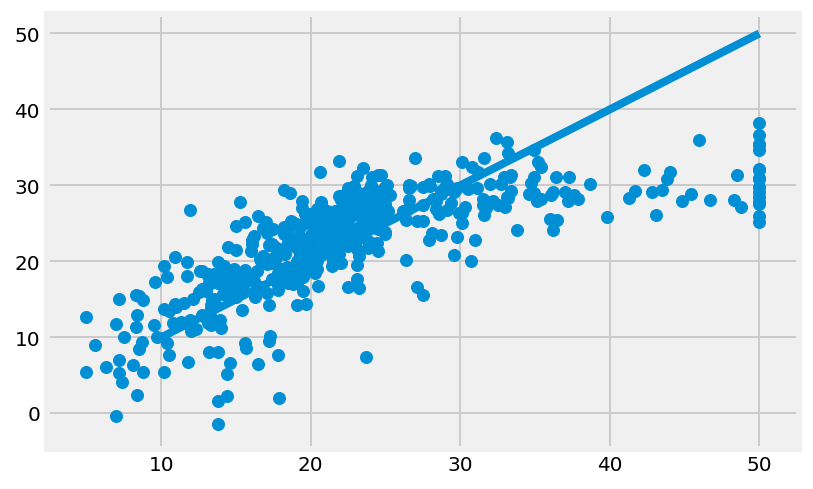

In [14]:
# A: 90/10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
predictions = cross_val_predict(model, X, y, cv=3)

model.fit(X_train,y_train)

# Print coefficients
# B1, B0
print(model.coef_[0] , model.intercept_ )

predictions = cross_val_predict(model, X, y, cv=5)

point_1 = [10, 50]
plt.plot(point_1, point_1)
plt.scatter(y, predictions)
plt.show()

### 4. Try K-Fold cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [16]:
# A:
# n_splits=7 seems better because we try to maximize the score. The score decrease when I 
# increase the  K-Fold  
scores = cross_val_score(model, X, y, cv=KFold(n_splits=5))
print("Mean cross-validated scores (cv = 5 ):", scores.mean())
print()
#-------------------------------------

scores = cross_val_score(model, X, y, cv=KFold(n_splits=10))
print("Mean cross-validated scores (cv = 10 ) :", scores.mean())
print()
#-----------------------------------------

scores = cross_val_score(model, X, y, cv=KFold(n_splits=7))
print("Mean cross-validated scores (cv = 7 ):", scores.mean())

Mean cross-validated scores (cv = 5 ): 0.34957803890023964

Mean cross-validated scores (cv = 10 ) : -0.12074797171232002

Mean cross-validated scores (cv = 7 ): 0.24078122496976873


### 5. [Bonus] Optimize the $R^2$ score

Can you optimize your $R^2$ by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [ ]:
# A: 

### 5.1 Can you explain what could be wrong with this approach?

In [ ]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [ ]:
import patsy

# A: